<a href="https://colab.research.google.com/github/MrCharli03/RL_BFRRCE/blob/main/prueba_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Esteban Becerra, Carlos Cruzado, Anastasiya Ruzhytska Email: esteban.becerraf@um.es carlos.cruzadoe1@um.es anastasiya.r.r@um.es Date: 2025/02/24

In [1]:

#@title Copiar el repositorio.

!git clone https://github.com/MrCharli03/RL_BFRRCE.git
!cd RL_BFRRCE/

Cloning into 'RL_BFRRCE'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 272 (delta 62), reused 11 (delta 6), pack-reused 175 (from 1)
Receiving objects: 100% (272/272), 3.08 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [2]:
#@title Importamos todas las clases y funciones

import sys

# Añadir los directorio fuentes al path de Python
sys.path.append('/content/RL_BFRRCE')
sys.path.append('/content/RL_BFRRCE/src')


# Verificar que se han añadido correctamente
print(sys.path)


['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/root/.ipython', '/content/RL_BFRRCE', '/content/RL_BFRRCE/src']


In [3]:
from MonteCarlo import MonteCarloOnPolicy, MonteCarloOffPolicy
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import imageio
from collections import defaultdict

In [4]:
# Crear el entorno Taxi-v3
env = gym.make("Taxi-v3", render_mode="rgb_array")  # Render para grabar el video

# Parámetros de entrenamiento
num_episodes = 10000
gamma = 0.9  # Descuento de recompensa
epsilon = 0.1  # Para ε-soft en On-Policy

# Entrenar Monte Carlo On-Policy
print("Entrenando Monte Carlo On-Policy...")
mc_on = MonteCarloOnPolicy(env, gamma=gamma, epsilon=epsilon)
Q_on, rewards_on, deltas_on = mc_on.train(num_episodes=num_episodes)

# Parámetros específicos para Off-Policy
initial_epsilon = 0.5  # Mayor exploración inicial
min_epsilon = 0.05
decay = 0.9995

# Entrenar Monte Carlo Off-Policy
print("Entrenando Monte Carlo Off-Policy...")
mc_off = MonteCarloOffPolicy(env, gamma=gamma, epsilon=initial_epsilon, min_epsilon=min_epsilon, epsilon_decay=decay)

# Inicializar target_policy como greedy sobre Q_off
target_policy = defaultdict(lambda: np.ones(env.action_space.n) * 0.05)
for state in Q_on:  # Usamos Q_on como punto de partida
    best_action = np.argmax(Q_on[state])
    target_policy[state][best_action] = 0.95  # Favorece la mejor acción

# Entrenar Off-Policy con la política objetivo definida
Q_off, rewards_off, deltas_off = mc_off.train(num_episodes, target_policy)


Entrenando Monte Carlo On-Policy...
Entrenando Monte Carlo Off-Policy...


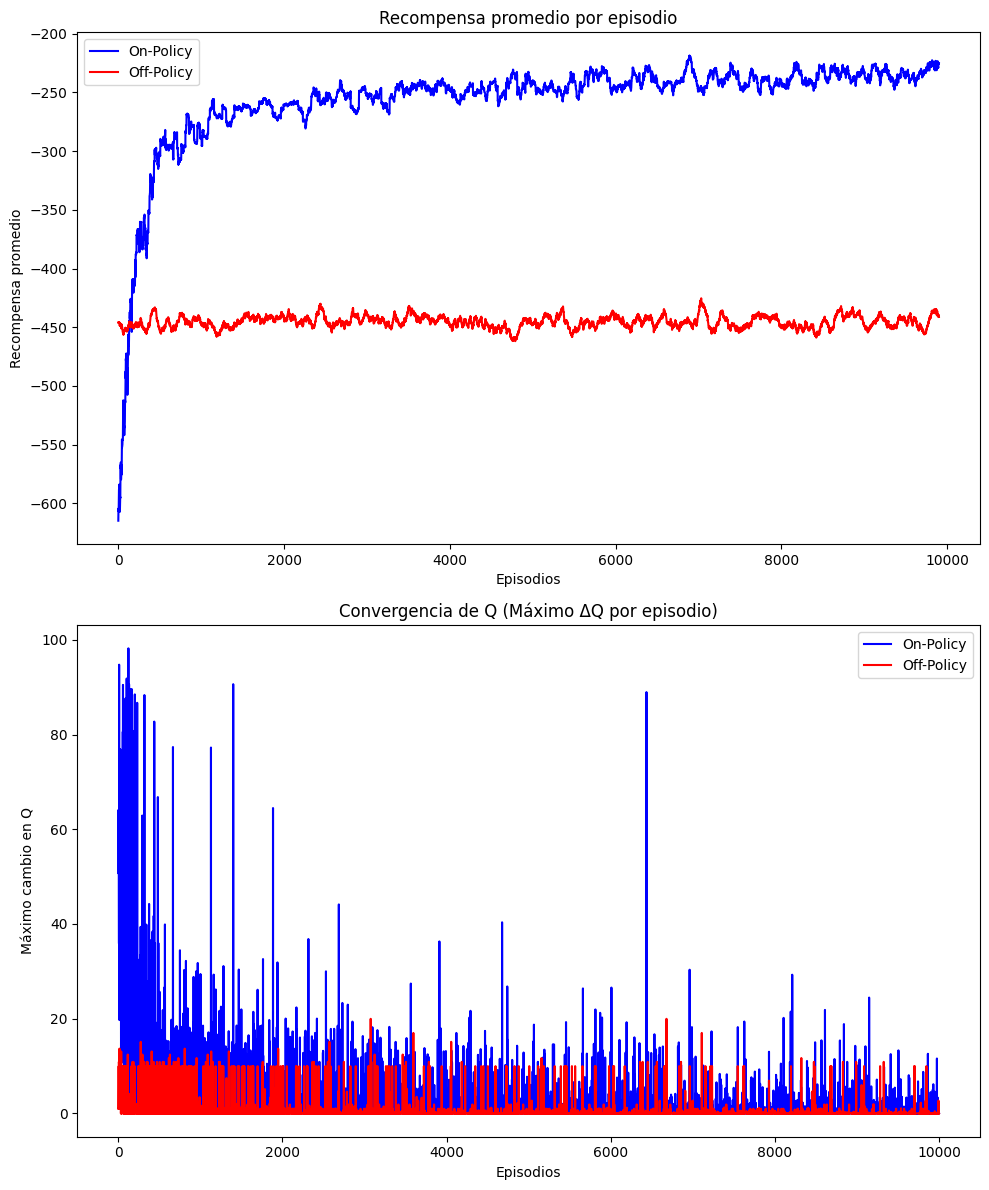

In [5]:
# ---- GRAFICAR RESULTADOS ----
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Recompensa promedio por episodio
axs[0].plot(np.convolve(rewards_on, np.ones(100)/100, mode="valid"), label="On-Policy", color='blue')
axs[0].plot(np.convolve(rewards_off, np.ones(100)/100, mode="valid"), label="Off-Policy", color='red')
axs[0].set_title("Recompensa promedio por episodio")
axs[0].set_xlabel("Episodios")
axs[0].set_ylabel("Recompensa promedio")
axs[0].legend()

# Convergencia de Q-values (máximo cambio en Q por episodio)
axs[1].plot(deltas_on, label="On-Policy", color='blue')
axs[1].plot(deltas_off, label="Off-Policy", color='red')
axs[1].set_title("Convergencia de Q (Máximo ΔQ por episodio)")
axs[1].set_xlabel("Episodios")
axs[1].set_ylabel("Máximo cambio en Q")
axs[1].legend()

plt.tight_layout()
plt.show()